### 무게를 찾기
- 목표: 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터 셋: fish.csv
- 피쳐/속성: Length
- 타겟/라벨: Weight
- 학습방법:	 지도학습/회귀
- 알고리즘:	 선형회귀 >>> 데이터 분포가 선형

#### [1] 데이터 준비 & 피쳐/타겟 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DATA_PATH = '../data/fish.csv'
fishDF = pd.read_csv(DATA_PATH)
fishDF.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [4]:
# mask = (fishDF['Species'] == 'Perch')
mask = fishDF.Species.isin(['Perch'])						# 강사님 Ver.
needDF = fishDF.loc[mask, ['Weight','Length']].copy().reset_index(drop=True)
needDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [5]:
featureDF = needDF['Length'].to_frame()
targetSR  = needDF['Weight']

#### [2] 학습준비
- 학습 알고리즘: Linear Regressor
- 피쳐 스케일링 (normalization) 
- 학습용/테스트용 데이터셋 분리

##### [2_1] 피쳐와 타겟 분리
- 차원 확인 습관!

In [6]:
# featureDF = needDF[['Length']]
# targetSR = needDF['Weight']

print(f'featureDF: {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR: {targetSR.shape}, {targetSR.ndim}D')

featureDF: (56, 1), 2D
targetSR: (56,), 1D


##### [2_2] 학습용 & 테스트용 데이터셋 분리
- 전체 데이터셋 ==>  학습용:테스트용 = 80:20, 75:25, 70:30
- 회귀 데이터셋 ==>  데이터셋 구성 요소에 대한 비율 고려 X

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.3,
                                                    random_state=3
													)

In [9]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D', f'y_train: {y_train.shape}, {y_train.ndim}D')
print(f'X_test: {X_test.shape}, {X_test.ndim}D', f'y_train: {y_test.shape}, {y_test.ndim}D')

X_train: (39, 1), 2D y_train: (39,), 1D
X_test: (17, 1), 2D y_train: (17,), 1D


In [10]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

##### [2_3] 피쳐 스케일링
- minmaxscaler
- weight, legnth 둘다 이상치 발견 X

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [13]:
# 스케일러에 데이터셋 전용 속성값 설정
mmScaler.fit(X_train)						# 기준 Scaler 생성

MinMaxScaler()

In [14]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.24277457]), array([0.02890173]), array([8.4]), array([43.]))

In [15]:
# 학습용/테스트용 데이터셋 전용 속성값 설정
X_train_scaled = mmScaler.transform(X_train)			# X_train으로 생성한 Scaler 기준으로 값 변환

X_test_scaled = mmScaler.transform(X_test)				# X_train으로 생성한 Scaler 기준으로 값 변환

#### [3] 학습진행

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# 모델 인스턴스 생성
model = LinearRegression()

# 모델 학습 w/ train_scaled_data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
print(f'기울기 개수: {len(model.coef_)}, 기울기:  {model.coef_} \n절편: {model.intercept_}')

기울기 개수: 1, 기울기:  [1188.12463495] 
절편: -290.9614968163929


In [18]:
# 모델 예측 w/ test_scaled_data
predict_y = model.predict(X_test_scaled)
print(predict_y)
print(predict_y.shape)


[141.70816793 382.08020391 107.36930565 897.16313813 759.807689
 931.50200041 152.00982662 244.72475478 862.82427585  62.72878469
 759.807689   176.04703022 450.75792847 358.04300031 914.33256927
  18.08826372 279.06361706]
(17,)


In [19]:
print(predict_y.reshape(-1,1))
print(predict_y.reshape(-1,1).shape)

[[141.70816793]
 [382.08020391]
 [107.36930565]
 [897.16313813]
 [759.807689  ]
 [931.50200041]
 [152.00982662]
 [244.72475478]
 [862.82427585]
 [ 62.72878469]
 [759.807689  ]
 [176.04703022]
 [450.75792847]
 [358.04300031]
 [914.33256927]
 [ 18.08826372]
 [279.06361706]]
(17, 1)


In [20]:
mmScaler.inverse_transform(predict_y.reshape(-1,1))

array([[ 4911.5026105 ],
       [13228.37505513],
       [ 3723.37797555],
       [31050.24457935],
       [26297.74603956],
       [32238.3692143 ],
       [ 5267.94000098],
       [ 8475.87651534],
       [29862.1199444 ],
       [ 2178.81595012],
       [26297.74603956],
       [ 6099.62724544],
       [15604.62432503],
       [12396.68781067],
       [31644.30689683],
       [  634.25392468],
       [ 9664.00115029]])

##### 시각화

In [21]:
# x축 weight 1D 변환
xxx = X_test_scaled.reshape(-1)

# 선형 회귀선 그리기
import numpy as np
x_minmax = np.array ( [min(xxx), max(xxx)])
fit_y = x_minmax*model.coef_[0] + model.intercept_

# np.polyfit Ver.
'''
import numpy as np
coef, intercept = np.polyfit(xxx,y_test,1)		# 1-> 1차원
print(f' y = {coef}x + {intercept}')


x_minmax = np.array( [min(xxx), max(xxx)] ) # x축 최소값, 최대값

fit_y = x_minmax*coef + intercept
'''

"\nimport numpy as np\ncoef, intercept = np.polyfit(xxx,y_test,1)\t\t# 1-> 1차원\nprint(f' y = {coef}x + {intercept}')\n\n\nx_minmax = np.array( [min(xxx), max(xxx)] ) # x축 최소값, 최대값\n\nfit_y = x_minmax*coef + intercept\n"

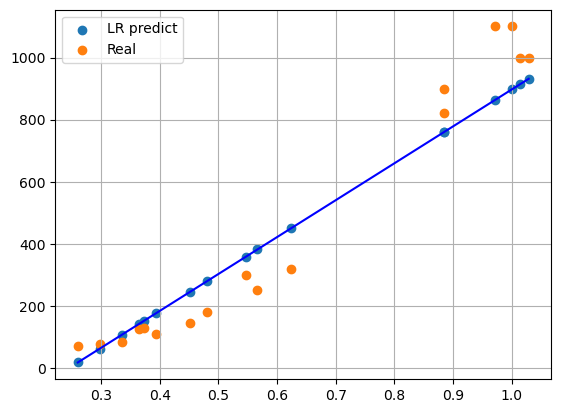

In [22]:
import matplotlib.pyplot as plt


plt.scatter(xxx ,predict_y, label='LR predict')
plt.scatter(xxx, y_test, label='Real')
plt.plot(x_minmax, fit_y, color='blue')
# plt.axvline(fit_y, predict_y, pre)
plt.legend()
plt.grid()
plt.show()

In [23]:
print(f'test score: {model.score(X_test_scaled, y_test)}')
print(f'train score: {model.score(X_train_scaled, y_train)}')

test score: 0.9282917588780841
train score: 0.9011711953915801


#### 다항회귀 Ver.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

In [37]:
# X1.reshape(-1,1), y_train


c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[-0.23141435],
       [-0.23830928],
       [-0.23141435],
       [-0.23830928],
       [-0.23016138],
       [-0.23726997],
       [-0.23224966],
       [-0.2389418 ],
       [-0.23392028],
       [-0.24006198],
       [-0.21721407],
       [-0.22016904],
       [-0.21930235],
       [-0.22371187],
       [-0.21637876],
       [-0.21866742],
       [-0.21387283],
       [-0.21387283],
       [-0.23475559],
       [-0.24054965],
       [-0.22581777],
       [-0.23282593],
       [-0.21637876],
       [-0.21866742],
       [-0.23834742],
       [-0.24209642],
       [-0.22840723],
       [-0.23563242],
       [-0.22682014],
       [-0.23396735],
       [-0.22682014],
       [-0.23396735],
       [-0.23726152],
       [-0.24172294],
       [-0.23057904],
       [-0.23762848],
       [-0.222393  ],
       [-0.22840144],
       [-0.23141435],
       [-0.23830928],
       [-0.22924254],
       [-0.23643876],
       [-0.23141435],
       [-0.23830928],
       [-0.22055531],
       [-0


Degree 1 회귀계수는 [1188.12] 입니다.
Degree 1 MSE는 nan 입니다.

Degree 2 회귀계수는 [-181.81 1224.88] 입니다.
Degree 2 MSE는 0.10950976974055675 입니다.


c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\utils\_param_validation.py", line 214, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\KDP-43\anaconda3\envs\ml_38\lib\site-packages\sklearn\metrics\_regression.py", line 1268, in mean_gamma_deviance
    return mean_tweedie_deviance(y_true, y_pred, sample_weight=sample_weight, power=2)
  File "c:\Users\KDP-43\anaconda3\envs\ml_38\lib

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

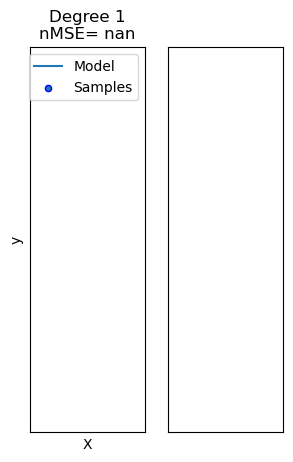

In [38]:
# 다항 회귀 degree 바꿔가며 모델 성능 점수 확인

degrees = list(range(1,9))
plt.figure(figsize=(14,5))


for i in range(len(degrees)):
    # for 구문 돌 때마다, 그래프 추가
    ax = plt.subplot(1,len(degrees), i+1)
    
    plt.setp(ax, xticks=(), yticks=())
    
	# 피쳐 확장
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    X1 = poly.fit_transform(X_train_scaled)

    # X1_scaled = mmScaler.transform(X1.reshape(-1,1))

    model = LinearRegression()
    model.fit(X1,y_train)


	# 교차 검증으로 다항회귀 평가
	# k 폴드 세트 6개 생성
    kfold_n = 6
    scores = cross_val_score(model, X1, y_train, 
                             scoring="neg_mean_gamma_deviance", cv=kfold_n)
    
	# 회귀계수 추출
    coeff = model.coef_
    
    print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i], np.round(coeff, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    

	# test 데이터 셋 생성
	# 0~1까지 100개 나눈
    X_test = np.linspace(0,1,100)

	# 예측값 곡선
    plt.plot(X_test_scaled, model.predict(X_test_scaled), label='Model')
	# 실제값 곡선
    # plt.plot(X_test, true_func(X_test),'--', label='True Function')
    plt.scatter(X_test_scaled, y_test, edgecolors='b', s=20, label='Samples')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {0}\nnMSE= {1:.2e}'.format(degrees[i],  -scores.mean()))

    

In [ ]:
y_train[[10, 30, 14, 31]].sum()/model.n_neighbors